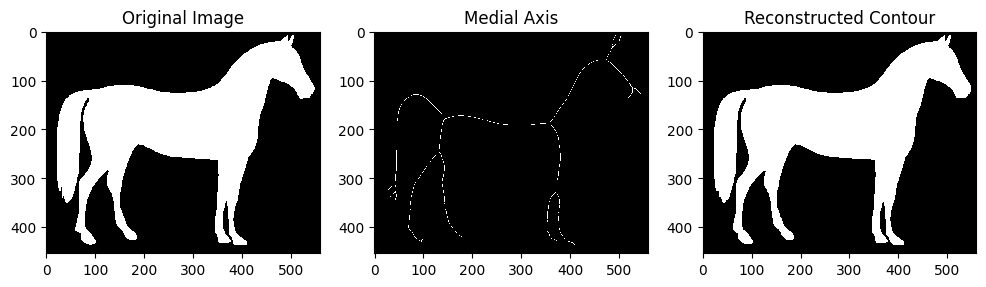

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import medial_axis
from skimage.draw import disk
from scipy.ndimage import distance_transform_edt
from skimage import io, color, morphology

def reconstruct_contour(skeleton, distance_map):
    # 获取中轴线上的坐标
    skeleton_points = np.transpose(np.nonzero(skeleton))

    # 根据距离变换获取每个中轴线点的宽度
    widths = distance_map[skeleton_points[:, 0], skeleton_points[:, 1]]

    # 初始化空白图像
    reconstructed_contour = np.zeros_like(skeleton, dtype=np.uint8)

    # 对每个中轴线点，根据宽度画圆
    for point, width in zip(skeleton_points, widths):
        rr, cc = disk((point[0], point[1]), radius=int(width))
        # 防止索引越界
        rr = np.clip(rr, 0, reconstructed_contour.shape[0] - 1)
        cc = np.clip(cc, 0, reconstructed_contour.shape[1] - 1)
        reconstructed_contour[rr, cc] = 1

    return reconstructed_contour

# 创建一个示例二进制图像
image = cv2.imread('./hourse.png', cv2.IMREAD_GRAYSCALE)
# 二值化处理
ret, image_ = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 定义膨胀和腐蚀的结构元素
selem = morphology.disk(radius=1)

# 膨胀操作，增加边缘区域
image = morphology.dilation(image_, selem)

# 腐蚀操作，减小边缘区域
image = morphology.erosion(image, selem)

# 计算中轴线和距离变换
skel, distance_map = medial_axis(image, return_distance=True)

# 从中轴线还原轮廓
reconstructed_contour = reconstruct_contour(skel, distance_map)

# 绘制结果
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.imshow(image_, cmap=plt.cm.gray, interpolation='nearest')
ax1.set_title('Original Image')

ax2.imshow(skel, cmap=plt.cm.gray, interpolation='nearest')
ax2.set_title('Medial Axis')

ax3.imshow(reconstructed_contour, cmap=plt.cm.gray, interpolation='nearest')
ax3.set_title('Reconstructed Contour')

plt.show()
